In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import sys
from PIL import Image
from io import BytesIO
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
default_D = 1.75
default_dL = .00125
default_N = 200
default_thresh = 1
default_d = .01
default_const = 2

# popt = {'D','dL','N','thresh','d','all'}
# pcov = {'D','dL','N','thresh','d','all'}

popt={}
pcov={}

param={}
lens={}
pred={}
raw={}
times={}

def func(x,a,b):
    return (a*x)**b

# def func_d(x,a,b):
#     return (a*x)**-b

def func_thresh(x,a,b):
    return (a*(200-x))**b

def func_all(x,m,b):
    return x*m+b


default_pred = default_const*default_D*default_dL*(default_N-default_thresh)/default_d #before squaring


In [3]:
D_path = '/Users/student/Box Sync/marshall-lab/revision/D_2017_10_26/D_2017_10_26/'

D_list = os.listdir(D_path)

D_param_list = []
D_pred_list = []
L_D_list = []
for i,elem in enumerate(D_list):
    [D_D,pred_D,L_D] = np.loadtxt(D_path+elem)
    D_param_list.append(D_D)
    D_pred_list.append(pred_D)
    L_D_list.append(L_D)
    
param['D'] = D_param_list
pred['D'] = D_pred_list
lens['D'] = L_D_list

In [4]:

# D
# raw['D']=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/diffconst/rangeOM.txt')
# lens['D']=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/diffconst/diffconst.txt')

# param['D']=[i*default_D for i in raw['D']]
# pred['D'] = [i * default_pred / default_D for i in param['D']]

# popt['D'],pcov['D'] = curve_fit(func,param['D'], lens['D'])

# num
num=np.zeros(100)
lens_num = np.zeros(100)

for node in range(0,10):
    n,L=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/num/num/num_%s.txt'%(node))
    num[node*10:((node+1)*10)] = n
    lens_num[node*10:((node+1)*10)] = L

param['N'] = num
lens['N'] = lens_num

pred['N'] = [(i-1) * default_pred / (default_N-default_thresh) for i in param['N']]
popt['N'],pcov['N'] = curve_fit(func,param['N']-1, lens['N'])

# thresh
thresh=np.zeros(100)
lensT = np.zeros(100)

for node in range(0,10):
    thr,L=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/thresh/thresh/thresh_%s.txt'%(node))
    thresh[node*10:((node+1)*10)] = thr
    lensT[node*10:((node+1)*10)] = L


param['thresh'] = thresh
lens['thresh'] = lensT

pred['thresh'] = [default_const*default_D*default_dL*(default_N-i)/default_d for i in param['thresh']]
popt['thresh'],pcov['thresh'] = curve_fit(func_thresh,param['thresh'], lens['thresh'])

# dL

dL=np.zeros(100)
lens_dL = np.zeros(100)

for node in range(0,10):
    dl,L=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/dL/dL/dL_%s.txt'%(node))
    dL[node*10:((node+1)*10)] = dl
    lens_dL[node*10:((node+1)*10)] = L


raw['dL'] = dL
param['dL'] = [i*default_dL for i in raw['dL']]
pred['dL'] = [i * default_pred / default_dL for i in param['dL']]

lens['dL'] = lens_dL

popt['dL'],pcov['dL'] = curve_fit(func,param['dL'], lens['dL'],bounds=(0,[70000,1]))


# d
dec=np.zeros(100)
lens_d = np.zeros(100)

for node in range(0,10):
    d,L=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/dec2/decay_%s.txt'%(node))
    dec[node*10:((node+1)*10)] = d
    lens_d[node*10:((node+1)*10)] = L

raw['d'] = dec
param['d'] = [i*default_d for i in raw['d']]
lens['d'] = lens_d

pred['d'] = [default_pred * default_d / i for i in param['d']]
# popt['d'],pcov['d'] = curve_fit(func_d,pred['d'], lens['d'],bounds=(0,[100,10]))
# popt['d'],pcov['d'] = curve_fit(func,pred['d'],lens['d'],bounds=(-np.inf, np.inf))
popt['d'],pcov['d'] = curve_fit(func,param['d'],lens['d'])


#all
N=100

raw['allD']=np.zeros(N)
raw['alldL']=np.zeros(N)
raw['alld']=np.zeros(N)
raw['allN']=np.zeros(N)
lens['all'] = np.zeros(N)
times['all'] = np.zeros(N)

#
#
# for node in range(0,10):
#     DC,dLen,decay,num, L, t=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/param/param/param_%s.txt'%(node))
#
#
#     raw['allD'][node*10:((node+1)*10)] = DC
#     raw['alldL'][node*10:((node+1)*10)] = dLen
#     raw['alld'][node*10:((node+1)*10)] = decay
#     raw['allN'][node*10:((node+1)*10)] = num
#
#     lens['all'][node*10:((node+1)*10)] = L
#     times['all'][node*10:((node+1)*10)] = t
#
#
# param['all'] = [a*b*d/c*default_pred for a,b,c,d in zip(raw['allD'],raw['alldL'],raw['alld'],raw['allN'])]
#
# pred['all'] = param['all']
#
# popt['all'],pcov['all'] = curve_fit(func,param['all'], lens['all'])


N=100

D=np.zeros(N)
dL=np.zeros(N)
dec=np.zeros(N)
Num=np.zeros(N)
lens['all'] = np.zeros(N)
times = np.zeros(N)

for node in range(0,10):
    DC,dLen,decay,num, L, t=np.loadtxt('/Users/student/Box Sync/marshall-lab/analysis/param/param/param_%s.txt'%(node))

    D[node*10:((node+1)*10)] = DC
    dL[node*10:((node+1)*10)] = dLen
    dec[node*10:((node+1)*10)] = decay
    Num[node*10:((node+1)*10)] = num

    lens['all'][node*10:((node+1)*10)] = L
    times[node*10:((node+1)*10)] = t


pred['all'] = (2*(D*1.75)*(dL*.00125)*(Num-1)/(dec*.01))**.5
pred['all'], lens['all'] = zip(*sorted(zip(pred['all'], lens['all'])))
#
# ### JUST SHORTER LENGTHS ###
# pred['all'] = pred['all'][:-5]
# lens['all'] = lens['all'][:-5]
# ###

param['all'] = pred['all']
popt['all'],pcov['all'] = curve_fit(func_all,pred['all'], lens['all'])

combo=pred['dL']+pred['N']+pred['d']+[i**2 for i in pred['D']]
pred['combo']=[i**.5 for i in combo]
lens['combo']=np.concatenate((lens['dL'],lens['N'],lens['d'],lens['D']))
popt['combo'],pcov['combo'] = curve_fit(func_all,pred['combo'], lens['combo'])

labelsize = 20
sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})


/Users/student/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in power


In [5]:
rand_all_path = '/Users/student/Box Sync/marshall-lab/revision/main_param_randset_2017_10_26/'
param_list = os.listdir(rand_all_path)

pred_randall_list = []
L_randall_list = []
for i,elem in enumerate(param_list):
    [D_randall,N_randall,dL_randall,d_randall,pred_randall,L_randall] = np.loadtxt(rand_all_path+elem)
    pred_randall_list.append(pred_randall)
    L_randall_list.append(L_randall)
    
pred['randall'] = pred_randall_list
lens['randall'] = L_randall_list

/Users/student/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


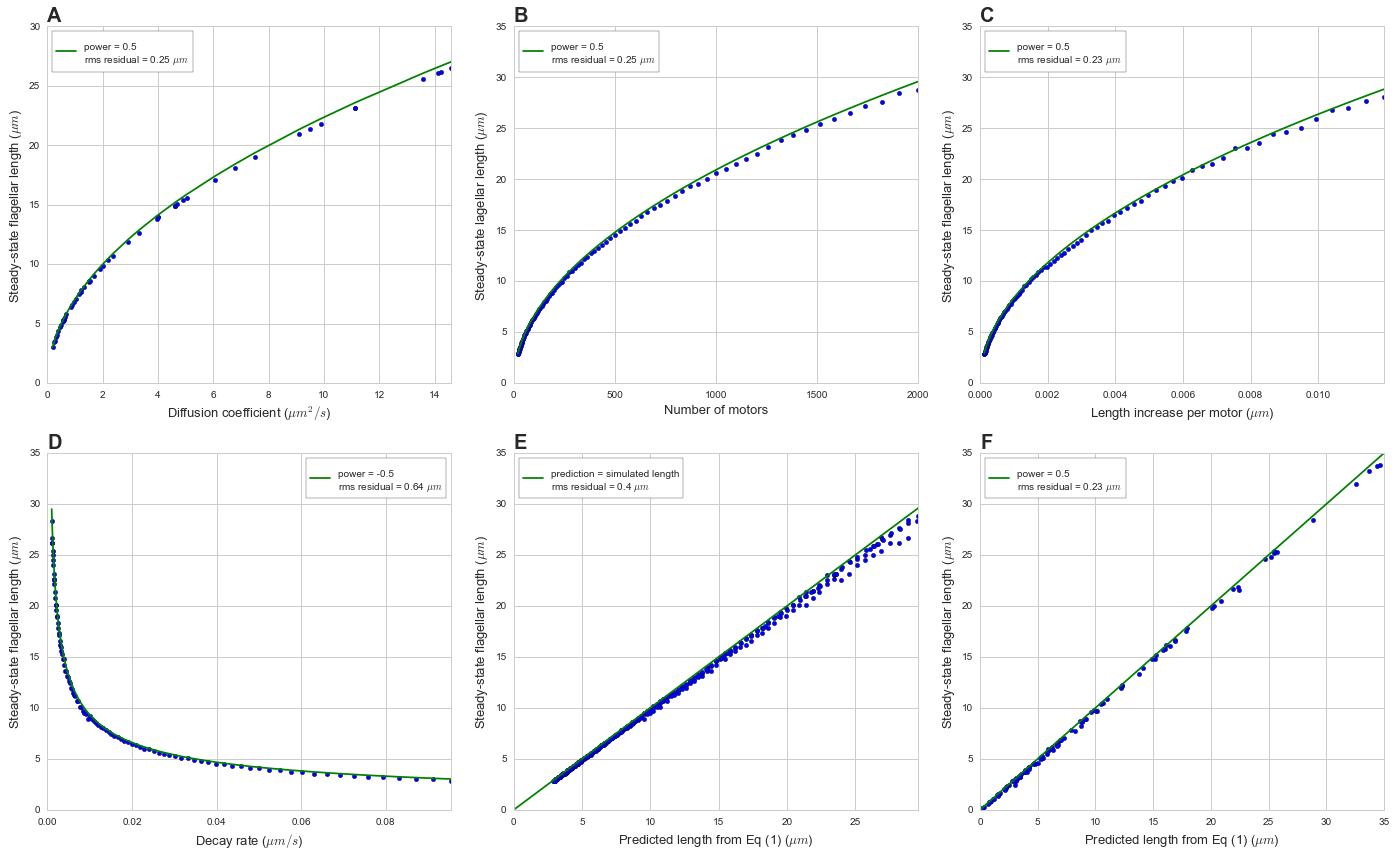

In [10]:

fig=plt.figure(1, figsize=(19.5,12),tight_layout=True);
# plt.suptitle('Robustness')

# L_trace
plt.subplot(231)
plt.scatter(param['D'],lens['D'])
# plt.plot(param['D'], [func(i, *popt['D']) for i in param['D']], 'r-', label='fit power = %s'%round(popt['D'][1],3))
plt.plot(np.sort(param['D']), np.sort(pred['D']), 
         label='\npower = 0.5\nrms residual = %s $\mu m$'%round(np.mean((np.sort(lens['D'])-np.sort(pred['D']))**2)**.5,2),c='g')
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('Diffusion coefficient (m^2/s)')
plt.xlabel(r'Diffusion coefficient ($\mu m^2/s$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
plt.xlim([0,max(param['D'])])
plt.grid(True)
legend=plt.legend(frameon=True,loc=2,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

plt.subplot(232)
plt.scatter(param['N'],lens['N'])
# plt.plot(param['N'], [func(i, *popt['N']) for i in param['N']], 'r-', label='fit power = %s'%round(popt['N'][1],3))
plt.plot(param['N'], [i**.5 for i in pred['N']],
         label='\npower = 0.5\nrms residual = %s $\mu m$'%round(np.mean((np.array(lens['N'])-np.array([i**.5 for i in pred['N']]))**2)**.5,2),c='g')
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Number of motors',fontsize=13)
plt.ylabel(r'Steady-state lagellar length ($\mu m$)',fontsize=13)
plt.grid(True)
# plt.xlim([0,2500])
plt.xlim([0,max(param['N'])])
legend=plt.legend(frameon=True,loc=2,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')


plt.subplot(234)
plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(param['d'],lens['d'])
# plt.plot(param['d'], [func(i, *popt['d']) for i in param['d']], 'r-', label='fit power = %s'%round(popt['d'][1],3))
plt.plot(param['d'], [i**.5 for i in pred['d']],
         label='\npower = -0.5\nrms residual = %s $\mu m$'%round(np.mean((np.array(lens['d'])-np.array([i**.5 for i in pred['d']]))**2)**.5,2),c='g')
plt.xlabel(r'Decay rate ($\mu m/s$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
plt.grid(True)
# plt.xlim([0,.1])
plt.xlim([0,max(param['d'])])
legend=plt.legend(frameon=True,loc=1,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

# plt.subplot(234)
# plt.scatter(param['thresh'],lens['thresh'])
# plt.plot(param['thresh'], [func_thresh(i, *popt['thresh']) for i in param['thresh']], 'r-', label='fit power of (200-x) = %s'%round(popt['thresh'][1],3))
# plt.plot(param['thresh'], [i**.5 for i in pred['thresh']],'k-',label='power = 0.5',c='g')
# plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('Threshold (# of motors in 200 motor system)',fontsize=13)
# plt.ylabel(r'flagellar length ($\mu m$)',fontsize=13)
# plt.xlim([0,200])
# plt.grid(True)
# plt.legend()

plt.subplot(233)
plt.scatter(param['dL'],lens['dL'])
# plt.plot(param['dL'], [func(i, *popt['dL']) for i in param['dL']], 'r-', label='fit power = %s'%round(popt['dL'][1],3))
plt.plot(param['dL'], [i**.5 for i in pred['dL']],'k-',
         label='\npower = 0.5\nrms residual = %s $\mu m$'%round(np.mean((np.array(lens['dL'])-np.array([i**.5 for i in pred['dL']]))**2)**.5,2),c='g')

plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Length increase per motor ($\mu m$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
plt.grid(True)
# plt.xlim([0,.015])
plt.xlim([0,max(param['dL'])])
legend=plt.legend(frameon=True,loc=2,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

plt.subplot(235)
plt.scatter(pred['combo'],lens['combo'])
# plt.plot(pred['combo'], [func_all(i, *popt['combo']) for i in pred['combo']], 'r-', label='line fit: y = %sx + %s'%(round(popt['combo'][0],3),round(popt['combo'][1],3)))
# plt.plot(pred['combo'], pred['combo'],'k-',label='y = x')
plt.plot(range(36), range(36),'k-',
         label='\nprediction = simulated length\nrms residual = %s $\mu m$'%round(np.mean((np.array(lens['combo'])-np.array(pred['combo']))**2)**.5,2),c='g')
plt.xlim([0,35])
plt.xlim([0,max(pred['combo'])])
plt.ylim([0,35])

# plt.scatter(param['all'],lens['all'])
# plt.plot(param['all'], [func_all(i, *popt['all']) for i in param['all']], 'r-', label='line fit: y = %sx + %s'%(round(popt['all'][0],3),round(popt['all'][1],3)))
# plt.plot(pred['all'], pred['all'],'k-',label='y = x')

plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('(2*D*(N-thresh)*dL/decay)^1/2')
plt.xlabel(r'Predicted length from Eq (1) ($\mu m$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
plt.grid(True)
legend=plt.legend(frameon=True,loc=2,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')



plt.subplot(236)
plt.scatter(pred['randall'],lens['randall'])
plt.plot([0,80],[0,80],
         label='\npower = 0.5\nrms residual = %s $\mu m$'%round(np.mean((np.array(lens['dL'])-np.array([i**.5 for i in pred['dL']]))**2)**.5,2),c='g')

plt.title('F',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Predicted length from Eq (1) ($\mu m$)',fontsize=13)
plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
plt.grid(True)
plt.xlim([0,35])
plt.ylim([0,35])
legend=plt.legend(frameon=True,loc=2,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')


#
png1 = BytesIO()
fig.savefig(png1, format='png')

# (2) load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
# png2.save('/Users/student/Box Sync/marshall-lab/figures/fig_param.tiff')
# png1.close()

# plt.savefig('/Users/student/Box Sync/marshall-lab/figures/fig_param.eps', format='eps', dpi=900)


# plt.savefig('/Users/student/Box Sync/marshall-lab/figures/fig_param.png')

# plt.show()
plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig03_params.png')
plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 3.png', format='png', dpi=1200)

In [120]:
np.mean(pred['combo'])

11.464369105125256

In [121]:
.41/11.46

0.03577661431064572